##  Importing required libraries and load the dataset

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(r"C:\Users\Jagan\Downloads\fraudTest.csv\fraudTest.csv")
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [82]:
df.shape

(555719, 12)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   merchant    555719 non-null  int32  
 1   category    555719 non-null  int32  
 2   amt         555719 non-null  float64
 3   gender      555719 non-null  int32  
 4   lat         555719 non-null  float64
 5   long        555719 non-null  float64
 6   city_pop    555719 non-null  int64  
 7   job         555719 non-null  int32  
 8   unix_time   555719 non-null  int64  
 9   merch_lat   555719 non-null  float64
 10  merch_long  555719 non-null  float64
 11  is_fraud    555719 non-null  int64  
dtypes: float64(5), int32(4), int64(3)
memory usage: 42.4 MB


In [76]:
df.describe()

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,555719.000000,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,555719.000000,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,343.086430,6.237059,69.392810,0.451367,38.543253,-90.231325,8.822189e+04,241.755040,1.380679e+09,38.542798,-90.231380,0.003860
std,201.284993,3.912874,156.745941,0.497630,5.061336,13.721780,3.003909e+05,136.327924,5.201104e+06,5.095829,13.733071,0.062008
min,0.000000,0.000000,1.000000,0.000000,20.027100,-165.672300,2.300000e+01,0.000000,1.371817e+09,19.027422,-166.671575,0.000000
25%,166.000000,3.000000,9.630000,0.000000,34.668900,-96.798000,7.410000e+02,124.000000,1.376029e+09,34.755302,-96.905129,0.000000
50%,346.000000,6.000000,47.290000,0.000000,39.371600,-87.476900,2.408000e+03,239.000000,1.380762e+09,39.376593,-87.445204,0.000000
75%,515.000000,10.000000,83.010000,1.000000,41.894800,-80.175200,1.968500e+04,362.000000,1.385867e+09,41.954163,-80.264637,0.000000
max,692.000000,13.000000,22768.110000,1.000000,65.689900,-67.950300,2.906700e+06,477.000000,1.388534e+09,66.679297,-66.952026,1.000000


##  Data preprocessing

In [37]:
#checking the missing values
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [39]:
#drop unwanted columns
df = df.drop(columns=['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'first', 'last', 'street', 'city', 'state', 'zip', 'trans_num', 'dob'])
df.head()

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,fraud_Kirlin and Sons,personal_care,2.86,M,33.9659,-80.9355,333497,Mechanical engineer,1371816865,33.986391,-81.200714,0
1,fraud_Sporer-Keebler,personal_care,29.84,F,40.3207,-110.4360,302,"Sales professional, IT",1371816873,39.450498,-109.960431,0
2,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,40.6729,-73.5365,34496,"Librarian, public",1371816893,40.495810,-74.196111,0
3,fraud_Haley Group,misc_pos,60.05,M,28.5697,-80.8191,54767,Set designer,1371816915,28.812398,-80.883061,0
4,fraud_Johnston-Casper,travel,3.19,M,44.2529,-85.0170,1126,Furniture designer,1371816917,44.959148,-85.884734,0


In [41]:
from sklearn.preprocessing import LabelEncoder
# Identify categorical columns for Label Encoding
categorical_cols = df.select_dtypes(include=['object']).columns

# Apply Label Encoding to categorical columns
encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])
df.head()    

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,319,10,2.86,1,33.9659,-80.9355,333497,275,1371816865,33.986391,-81.200714,0
1,591,10,29.84,0,40.3207,-110.4360,302,392,1371816873,39.450498,-109.960431,0
2,611,5,41.28,0,40.6729,-73.5365,34496,259,1371816893,40.495810,-74.196111,0
3,222,9,60.05,1,28.5697,-80.8191,54767,407,1371816915,28.812398,-80.883061,0
4,292,13,3.19,1,44.2529,-85.0170,1126,196,1371816917,44.959148,-85.884734,0


##  Data Visualization

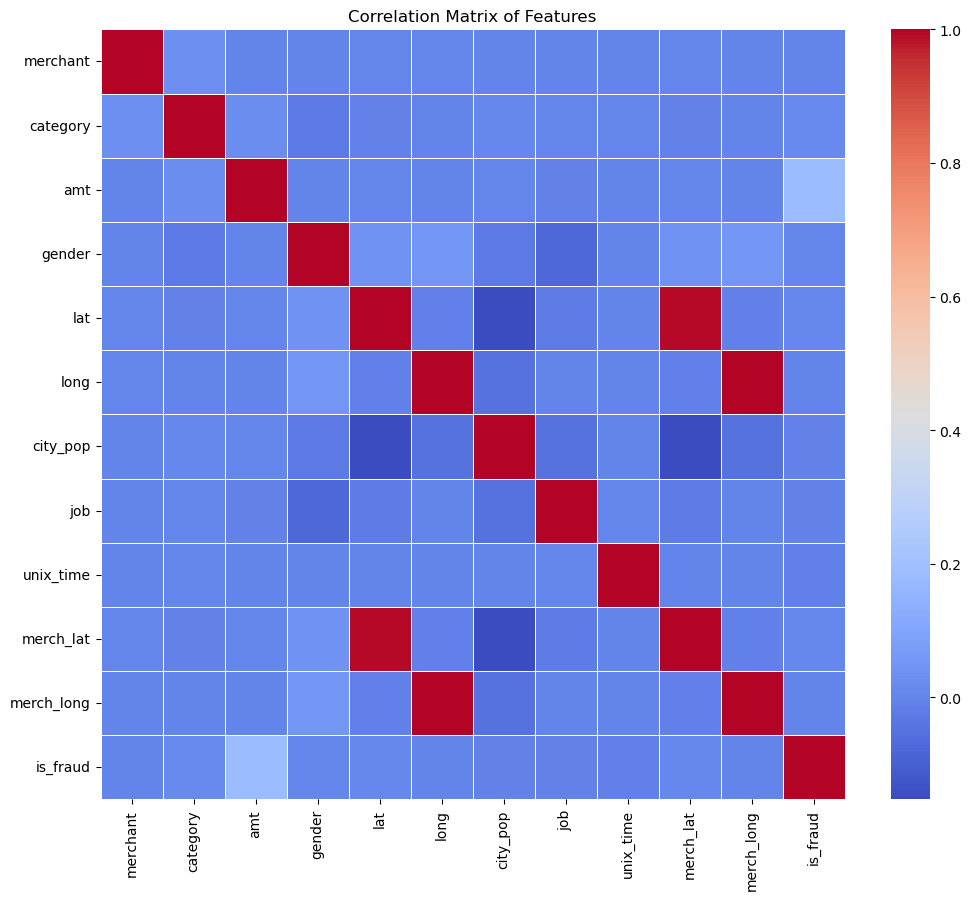

In [67]:
# Generate a correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

## Dividing the data into X-variable and y-variable

In [43]:
#seperating features and target columns
x = df.drop('is_fraud',axis=1)
y=df['is_fraud']

##   splitting the data  

In [45]:
#splitting the data into training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2,random_state = 42)

## Train Model

In [150]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train) 
x_test_scaled = scaler.transform(x_test)

### Logistic Regression

In [96]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty = 'l2',C = 0.01)
lr.fit(x_train,y_train)

LogisticRegression(C=0.01)

#### model prediction and model evaluation

In [98]:
y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

In [100]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Testing Accuracy: {test_accuracy:.2f}')
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred,zero_division = 0))

Training Accuracy: 1.00
Testing Accuracy: 1.00

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110718
           1       0.00      0.00      0.00       426

    accuracy                           1.00    111144
   macro avg       0.50      0.50      0.50    111144
weighted avg       0.99      1.00      0.99    111144



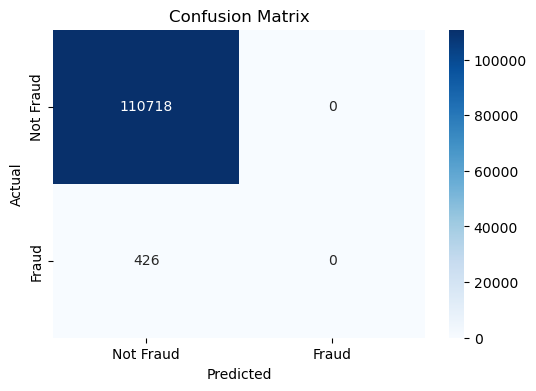

In [102]:
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Random Forest

In [49]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100,random_state = 42)
model.fit(x_train_scaled,y_train)

RandomForestClassifier(random_state=42)

#### model prediction and model evaluation

y_train_pred = model.predict(x_train_scaled)
y_test_pred = model.predict(x_test_scaled)

In [91]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Testing Accuracy: {test_accuracy:.2f}')
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred))

Training Accuracy: 1.00
Testing Accuracy: 1.00

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110718
           1       0.93      0.61      0.73       426

    accuracy                           1.00    111144
   macro avg       0.96      0.80      0.87    111144
weighted avg       1.00      1.00      1.00    111144



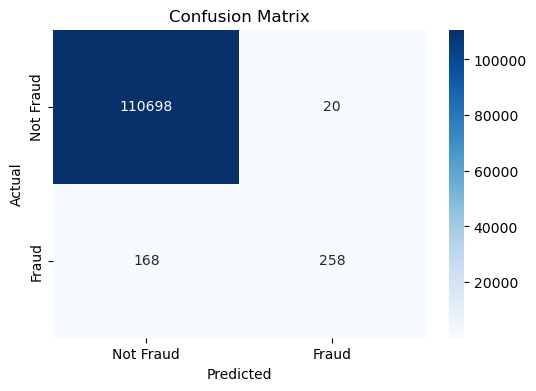

In [93]:
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Decision Tree

In [133]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(ccp_alpha = 0.01,random_state=42)
decision_tree.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.01, random_state=42)

#### model prediction and model evaluation

In [135]:
y_train_pred = model.predict(x_train_scaled)
y_test_pred = model.predict(x_test_scaled)

In [137]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Testing Accuracy: {test_accuracy:.2f}')
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred))

Training Accuracy: 1.00
Testing Accuracy: 1.00

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110718
           1       0.93      0.61      0.73       426

    accuracy                           1.00    111144
   macro avg       0.96      0.80      0.87    111144
weighted avg       1.00      1.00      1.00    111144



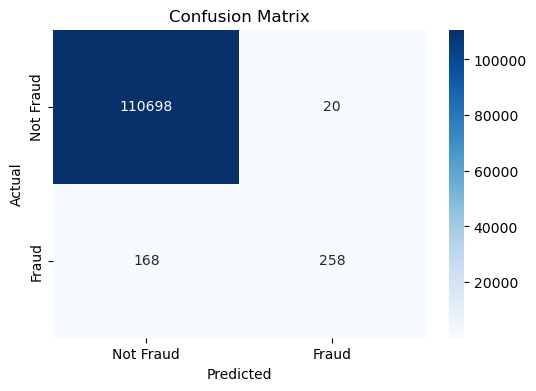

In [139]:
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()